### What is Pandas?

- pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive.
- Pandas is the backbone of the most Data projects.

- pandas is well suited for many different kinds of data:

    - Tabular data with heterogeneously-typed columns, as in an SQL table or Excel spreadsheet

    - Ordered and unordered (not necessarily fixed-frequency) time series data.

    - Arbitrary matrix data (homogeneously typed or heterogeneous) with row and column labels

    - Any other form of observational / statistical data sets. The data need not be labeled at all to be placed into a pandas data structure.

- The two primary data structures of pandas, Series (1-dimensional) and DataFrame (2-dimensional), handle the vast majority of typical use cases in finance, statistics, social science, and many areas of engineering.

In [1]:
# Importing Pandas

import pandas as pd

#### Creating DataFrames from scratch

- There are many ways to create a DataFrame from scratch, but a great option is to just use a simple dict

In [2]:
data = {
    'bmw': [3,2,1,0],
    'tesla': [0,1,2,3]
}

# passing it to the DataFrame Constructor

df = pd.DataFrame(data)

df

,bmw,tesla
0,3,0
1,2,1
2,1,2
3,0,3


**Working Process**

- Each (key, value) item in data corresponds to a column in the resulting DataFrame.

- The Index of this DataFrame was given to us on creation as the numbers 0-3, but we could also create our own when we initialize the DataFrame.

- Let's add out custome Index

In [3]:
# Adding Months as Index

df = pd.DataFrame(data, index=['january', 'february', 'march', 'april'])

df

,bmw,tesla
january,3,0
february,2,1
march,1,2
april,0,3


In [4]:
# we can locate by index also using "loc" method

df.loc['march']

bmw      1
tesla    2
Name: march, dtype: int64

#### Reading Data

- It’s quite simple to load data from various file formats into a DataFrame.
- We will use CSV file and pandas "read_csv" method to load the data into DataFrame.

In [5]:
# Reading Data using read_csv method

df2 = pd.read_csv('Customer.csv')

df2

,Customer ID,Customer Name,Segment,Age,Country,City,State,Postal Code,Region
0,CG-12520,Claire Gute,Consumer,67,United States,Henderson,Kentucky,42420,South
1,DV-13045,Darrin Van Huff,Corporate,31,United States,Los Angeles,California,90036,West
2,SO-20335,Sean O'Donnell,Consumer,65,United States,Fort Lauderdale,Florida,33311,South
3,BH-11710,Brosina Hoffman,Consumer,20,United States,Los Angeles,California,90032,West
4,AA-10480,Andrew Allen,Consumer,50,United States,Concord,North Carolina,28027,South
...,...,...,...,...,...,...,...,...,...
788,CJ-11875,Carl Jackson,Corporate,64,United States,Philadelphia,Pennsylvania,19140,East
789,RS-19870,Roy Skaria,Home Office,39,United States,Burlington,Iowa,52601,Central
790,SC-20845,Sung Chung,Consumer,69,United States,Arlington Heights,Illinois,60004,Central
791,RE-19405,Ricardo Emerson,Consumer,35,United States,Kent,Ohio,44240,East


In [6]:
# CSVs don't have indexes like our DataFrames, so all we need to do is just designate the index_col when reading
# Here we're setting the index to be column zero.
#You'll find that most CSVs won't ever have an index column and so usually you don't have to worry about this step

df2 = pd.read_csv('Customer.csv', index_col=0)

df2

,Customer Name,Segment,Age,Country,City,State,Postal Code,Region
Customer ID,,,,,,,,
CG-12520,Claire Gute,Consumer,67,United States,Henderson,Kentucky,42420,South
DV-13045,Darrin Van Huff,Corporate,31,United States,Los Angeles,California,90036,West
SO-20335,Sean O'Donnell,Consumer,65,United States,Fort Lauderdale,Florida,33311,South
BH-11710,Brosina Hoffman,Consumer,20,United States,Los Angeles,California,90032,West
AA-10480,Andrew Allen,Consumer,50,United States,Concord,North Carolina,28027,South
...,...,...,...,...,...,...,...,...
CJ-11875,Carl Jackson,Corporate,64,United States,Philadelphia,Pennsylvania,19140,East
RS-19870,Roy Skaria,Home Office,39,United States,Burlington,Iowa,52601,Central
SC-20845,Sung Chung,Consumer,69,United States,Arlington Heights,Illinois,60004,Central


**Mostly useful Methods to Read Data from different type of File Format**

| **Method** |**File Format**|
|------------|---------------|
|read_json |json|
|read_html| html|
|read_excel|xlsx|
|read_sql|sql|

- There are many other file format supported by pandas, but these given formats are mostly used when work with data.

### DataFrame Operations

- DataFrames possess hundreds of methods and other operations that are crucial to any analysis.
    - We have loaded our "Customer" Dataset to begin.

**Viewing Data**

- The first thing to do when opening a new dataset is print out a few rows to keep as a visual reference. We accomplish this with .head()

In [7]:
# .head() outputs the first five rows of your DataFrame by default, but we could also pass a number as well

df2.head()

,Customer Name,Segment,Age,Country,City,State,Postal Code,Region
Customer ID,,,,,,,,
CG-12520,Claire Gute,Consumer,67,United States,Henderson,Kentucky,42420,South
DV-13045,Darrin Van Huff,Corporate,31,United States,Los Angeles,California,90036,West
SO-20335,Sean O'Donnell,Consumer,65,United States,Fort Lauderdale,Florida,33311,South
BH-11710,Brosina Hoffman,Consumer,20,United States,Los Angeles,California,90032,West
AA-10480,Andrew Allen,Consumer,50,United States,Concord,North Carolina,28027,South


In [8]:
# To see the last five rows use .tail(). tail() also accepts a number

df2.tail(3)

,Customer Name,Segment,Age,Country,City,State,Postal Code,Region
Customer ID,,,,,,,,
SC-20845,Sung Chung,Consumer,69,United States,Arlington Heights,Illinois,60004,Central
RE-19405,Ricardo Emerson,Consumer,35,United States,Kent,Ohio,44240,East
SM-20905,Susan MacKendrick,Consumer,46,United States,Newark,Ohio,43055,East


**Getting Info about the Data**

- .info() should be one of the very first commands you run after loading your data

In [9]:
# .info() provides the essential details about your dataset, such as the number of rows and columns, 
# the number of non-null values, what type of data is in each column, and how much memory your DataFrame is using.

df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 793 entries, CG-12520 to SM-20905
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Customer Name  793 non-null    object
 1   Segment        793 non-null    object
 2   Age            793 non-null    int64 
 3   Country        793 non-null    object
 4   City           793 non-null    object
 5   State          793 non-null    object
 6   Postal Code    793 non-null    int64 
 7   Region         793 non-null    object
dtypes: int64(2), object(6)
memory usage: 55.8+ KB


In [10]:
# Another fast and useful attribute is .shape, which outputs just a tuple of (rows, columns)

df2.shape

(793, 8)

**Handling Duplicates**

- This dataset does not have duplicate rows, but it is always important to verify you aren't aggregating duplicate rows

- To demonstrate, let's simply just double up our Customers DataFrame by appending it to itself


In [11]:
tempDF = df2.append(df2)

tempDF.shape

(1586, 8)

- Now Drop Duplicate values

In [12]:
tempDF = tempDF.drop_duplicates()

tempDF.shape

(793, 8)

- Important Arguments in drop_duplicate Function
    
    - inplace=True/False :: the data is modified in place, which means it will return nothing and the dataframe is now updated. When inplace = False , which is the default, then the operation is performed and it returns a copy of the object.
    
    - first: (default) Drop duplicates except for the first occurrence.
    
    - last: Drop duplicates except for the last occurrence.
    
    - False: Drop all duplicates.

**Column Cleanup**

- Many times datasets will have verbose column names with symbols, upper and lowercase words, spaces, and typos. To make selecting data by column name easier we can spend a little time cleaning up their names.

In [13]:
# Printing Column Names

df2.columns

Index(['Customer Name', 'Segment', 'Age', 'Country', 'City', 'State',
       'Postal Code', 'Region'],
      dtype='object')

- We can rename columns using columns argument in .rename method

In [14]:
df2.rename(columns={
    'Customer Name': 'CustomerName'
},inplace=True)

df2.columns

Index(['CustomerName', 'Segment', 'Age', 'Country', 'City', 'State',
       'Postal Code', 'Region'],
      dtype='object')

- we can make all the column names in lower case using list comprehension

In [15]:
df2.columns = [col.lower() for col in df2]

df2.columns

Index(['customername', 'segment', 'age', 'country', 'city', 'state',
       'postal code', 'region'],
      dtype='object')

#### Working with Missing Values

- When exploring data, you’ll most likely encounter missing or null values, which are essentially placeholders for non-existent values. Most commonly you'll see Python's None or NumPy's np.nan, each of which are handled differently in some situations.

- There are two options in dealing with nulls:

    - Get rid of rows or columns with nulls
    - Replace nulls with non-null values, a technique known as imputation

- Let's Load another dataset, which is House_Price dataset

In [16]:
# reading dataset using read_csv

hp = pd.read_csv('House_Price.csv')

hp.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474


In [17]:
# lets get information about our dataset

hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   498 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

- from .info() function you can visualize which variable contains Non-Null Count
- RangeIndex shows us that, we have 506 entries in our dataset
- from above data you can see "n_hos_beds" variable contains only 498 value instead of 506.



- Other way to check is to use isnull() function.

- isnull() returns a DataFrame where each cell is either True or False depending on that cell's null status.

- To count the number of nulls in each column we use an aggregate function for summing

In [18]:
hp.isnull().sum()

price          0
crime_rate     0
resid_area     0
air_qual       0
room_num       0
age            0
dist1          0
dist2          0
dist3          0
dist4          0
teachers       0
poor_prop      0
airport        0
n_hos_beds     8
n_hot_rooms    0
waterbody      0
rainfall       0
bus_ter        0
parks          0
dtype: int64

- we can see that our "n_hos_beds" has 8 missing values.

**Removing Null Values**

- removing null data is only suggested if you have a small amount of missing data

- To remove null values we can use dropna() function

In [19]:
hp.dropna()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,0.06263,41.93,0.573,6.593,69.1,2.64,2.45,2.76,2.06,19.0,9.67,NO,9.348,12.1792,Lake and River,27,YES,0.056006
502,20.6,0.04527,41.93,0.573,6.120,76.7,2.44,2.11,2.46,2.14,19.0,9.08,YES,6.612,13.1648,Lake and River,20,YES,0.059903
503,23.9,0.06076,41.93,0.573,6.976,91.0,2.34,2.06,2.29,1.98,19.0,5.64,NO,5.478,12.1912,None,31,YES,0.057572
504,22.0,0.10959,41.93,0.573,6.794,89.3,2.54,2.31,2.40,2.31,19.0,6.48,YES,7.940,15.1760,None,47,YES,0.060694


- This operation will delete any row with at least a single null value, but it will return a new DataFrame without altering the original one. You could specify inplace=True in this method as well.

- Other than just dropping rows, you can also drop columns with null values by setting axis=1

In [20]:
hp.dropna(axis=1)

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,101.1200,None,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,11.2896,Lake,55,YES,0.039474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,22.4,0.06263,41.93,0.573,6.593,69.1,2.64,2.45,2.76,2.06,19.0,9.67,NO,12.1792,Lake and River,27,YES,0.056006
502,20.6,0.04527,41.93,0.573,6.120,76.7,2.44,2.11,2.46,2.14,19.0,9.08,YES,13.1648,Lake and River,20,YES,0.059903
503,23.9,0.06076,41.93,0.573,6.976,91.0,2.34,2.06,2.29,1.98,19.0,5.64,NO,12.1912,None,31,YES,0.057572
504,22.0,0.10959,41.93,0.573,6.794,89.3,2.54,2.31,2.40,2.31,19.0,6.48,YES,15.1760,None,47,YES,0.060694


#### Imputation

- Imputation is a conventional feature engineering technique used to keep valuable data that have null values.

- There may be instances where dropping every row with a null value removes too big a chunk from your dataset, so instead we can impute that null with another value, usually the mean or the median of that column.

- Let's look at missing value imputation on our "n_hos_beds" column.

In [21]:
n_hos_beds = hp['n_hos_beds']

n_hos_beds.head()

0    5.480
1    7.332
2    7.394
3    9.268
4    8.824
Name: n_hos_beds, dtype: float64

- We'll impute the missing values of revenue using the mean

In [22]:
n_hos_beds_mean = n_hos_beds.mean()

n_hos_beds_mean

7.899767068273099

- With the mean, let's fill the nulls using fillna()

In [23]:
n_hos_beds.fillna(n_hos_beds_mean, inplace=True)

- we have now replaced all the null values in column "n_hos_beds" and inplace=True have actually affected the original "hp".

In [24]:
hp.isnull().sum()

price          0
crime_rate     0
resid_area     0
air_qual       0
room_num       0
age            0
dist1          0
dist2          0
dist3          0
dist4          0
teachers       0
poor_prop      0
airport        0
n_hos_beds     0
n_hot_rooms    0
waterbody      0
rainfall       0
bus_ter        0
parks          0
dtype: int64

In [25]:
hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   506 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

#### Understanding of Variables

- Using describe() on an entire DataFrame we can get a summary of the distribution of continuous variables

In [26]:
hp.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,3.613524,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,13.041605,39.181818,0.054454
std,9.182176,8.601545,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.464939,5.238957,12.513697,0.010632
min,5.000000,0.006320,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,3.000000,0.033292
25%,17.025000,0.082045,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.659000,11.189800,28.000000,0.046464
50%,21.200000,0.256510,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.963000,12.720000,39.000000,0.053507
75%,25.000000,3.677082,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.076000,14.170800,50.000000,0.061397
max,50.000000,88.976200,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,101.120000,60.000000,0.086711


- Understanding which numbers are continuous also comes in handy when thinking about the type of plot to use to represent your data visually

- .describe() can also be used on a categorical variable to get the count of rows, unique count of categories, top category, and freq of top category

In [27]:
hp['waterbody'].describe()

count       506
unique        4
top       River
freq        183
Name: waterbody, dtype: object

- This shows us that waterbody has 4 values, the top value is River, which shows up 183 times.

- .value_counts() can tell us the frequency of all values in a column

In [28]:
hp['waterbody'].value_counts().head()

River             183
None              155
Lake               97
Lake and River     71
Name: waterbody, dtype: int64

**Relationship Between Continuous variables**

- By using the correlation method .corr() we can generate the relationship between each continuous variable

In [29]:
hp.corr()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks
price,1.000000,-0.389582,-0.484754,-0.429300,0.696304,-0.377999,0.251355,0.249459,0.246650,0.248200,0.505655,-0.740836,0.108880,0.023122,-0.047426,-0.391574
crime_rate,-0.389582,1.000000,0.406583,0.420972,-0.219247,0.352734,-0.380050,-0.379813,-0.380069,-0.376462,-0.289946,0.455621,0.017371,0.013518,0.059204,0.383235
resid_area,-0.484754,0.406583,1.000000,0.763651,-0.391676,0.644779,-0.706481,-0.707956,-0.707566,-0.705819,-0.383248,0.603800,0.005799,-0.000839,0.055810,0.707635
air_qual,-0.429300,0.420972,0.763651,1.000000,-0.302188,0.731470,-0.768589,-0.769724,-0.769157,-0.764873,-0.188933,0.590879,-0.049553,-0.004882,0.092104,0.915544
room_num,0.696304,-0.219247,-0.391676,-0.302188,1.000000,-0.240265,0.208464,0.203981,0.201907,0.205397,0.355501,-0.613808,0.032009,0.030674,-0.064694,-0.282817
age,-0.377999,0.352734,0.644779,0.731470,-0.240265,1.000000,-0.746904,-0.746493,-0.747021,-0.746707,-0.261515,0.602339,-0.021012,0.009380,0.075198,0.673850
dist1,0.251355,-0.380050,-0.706481,-0.768589,0.208464,-0.746904,1.000000,0.997905,0.997735,0.994073,0.232834,-0.498823,-0.030365,-0.014463,-0.036794,-0.706319
dist2,0.249459,-0.379813,-0.707956,-0.769724,0.203981,-0.746493,0.997905,1.000000,0.998097,0.994003,0.233707,-0.495693,-0.031071,-0.010239,-0.038005,-0.708237
dist3,0.246650,-0.380069,-0.707566,-0.769157,0.201907,-0.747021,0.997735,0.998097,1.000000,0.994126,0.233588,-0.494290,-0.028315,-0.010077,-0.041470,-0.709346
dist4,0.248200,-0.376462,-0.705819,-0.764873,0.205397,-0.746707,0.994073,0.994003,0.994126,1.000000,0.228256,-0.496084,-0.021534,-0.005850,-0.032542,-0.703508


- Correlation tables are a numerical representation of the bivariate relationships in the dataset.

- Positive numbers indicate a positive correlation — one goes up the other goes up — and negative numbers represent an inverse correlation — one goes up the other goes down. 1.0 indicates a perfect correlation.

- The Correlation table is correlation matrix, so each variable has "1" value with it's own. [ price vs price]

#### DataFrame Slicing, Selecting, Extracting

- Below are the other methods of slicing, selecting, and extracting you'll need to use constantly

- It's important to note that, although many methods are the same, DataFrames and Series have different attributes, so you'll need be sure to know which type you are working with or else you will receive attribute errors

- Let's look at working with columns first.

**By column**

- You already saw how to extract a column using square brackets like this

In [30]:
price = hp['price']

type(price)

pandas.core.series.Series

- This will return a Series. To extract a column as a DataFrame, you need to pass a list of column names. In our case that's just a single column

In [31]:
price = hp[['price']]

type(price)

pandas.core.frame.DataFrame

- Since it's just a list, adding another column name is easy

In [32]:
subset = hp[['price', 'crime_rate']]

subset.head()

,price,crime_rate
0,24.0,0.00632
1,21.6,0.02731
2,34.7,0.02729
3,33.4,0.03237
4,36.2,0.06905


**By Rows**

- For rows, we have two options:

    - .loc - locates by name
    - .iloc- locates by numerical index

In [33]:
hp.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474


In [34]:
# we will fetch value using index, so we will pass index number in .loc

data = hp.loc[1]
data

price               21.6
crime_rate       0.02731
resid_area         37.07
air_qual           0.469
room_num           6.421
age                 78.9
dist1               4.99
dist2                4.7
dist3               5.12
dist4               5.06
teachers            22.2
poor_prop           9.14
airport               NO
n_hos_beds         7.332
n_hot_rooms      12.1728
waterbody           Lake
rainfall              42
bus_ter              YES
parks          0.0461456
Name: 1, dtype: object

- On the other hand, with iloc we give it the numerical index

In [35]:
data = hp.iloc[1]

- loc and iloc can be thought of as similar to Python list slicing. To show this even further, let's select multiple rows

In [36]:
hp_subset = hp.loc[7:10]

hp_subset

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
7,22.1,0.14455,37.87,0.524,6.172,96.1,6.04,5.85,6.25,5.66,24.8,19.15,NO,5.842,12.1768,Lake,56,YES,0.057075
8,16.5,0.21124,37.87,0.524,5.631,100.0,6.18,5.85,6.30,6.00,24.8,29.93,YES,5.930,12.1320,None,55,YES,0.056302
9,18.9,0.17004,37.87,0.524,6.004,85.9,6.67,6.55,6.85,6.29,24.8,17.10,YES,9.478,14.1512,River,45,YES,0.050727
10,15.0,0.22489,37.87,0.524,6.377,94.3,6.65,6.31,6.55,5.88,24.8,20.45,NO,6.000,11.1200,Lake,29,YES,0.057775


**Conditional Selections**

- we can use condition to filter out data accordingly.

- we take a column from the DataFrame and apply a Boolean condition to it.

In [37]:
condition = (hp['waterbody'] == "River")

condition.head(20)

0      True
1     False
2     False
3     False
4     False
5     False
6      True
7     False
8     False
9      True
10    False
11    False
12    False
13    False
14    False
15     True
16    False
17    False
18    False
19    False
Name: waterbody, dtype: bool

- Similar to isnull(), this returns a Series of True and False values

- To returns the rows where condition is True we have to pass condition in DataFrame

In [38]:
hp[hp['waterbody'] == "River"].head(10)

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
6,22.9,0.08829,37.87,0.524,6.012,66.6,5.87,5.47,5.70,5.20,24.8,12.43,YES,6.958,12.1832,River,41,YES,0.052170
9,18.9,0.17004,37.87,0.524,6.004,85.9,6.67,6.55,6.85,6.29,24.8,17.10,YES,9.478,14.1512,River,45,YES,0.050727
15,19.9,0.62739,38.14,0.538,5.834,56.5,4.60,4.35,4.72,4.32,19.0,8.47,YES,8.498,14.1592,River,28,YES,0.059751
22,15.2,1.23247,38.14,0.538,6.142,91.7,4.18,3.98,4.31,3.45,19.0,18.72,YES,5.804,14.1216,River,48,YES,0.057414
25,13.9,0.84054,38.14,0.538,5.599,85.7,4.69,4.33,4.72,4.08,19.0,16.51,YES,9.378,13.1112,River,35,YES,0.051585
28,18.4,0.77299,38.14,0.538,6.495,94.4,4.57,4.35,4.69,4.21,19.0,12.80,YES,5.968,15.1472,River,35,YES,0.054327
29,21.0,1.00245,38.14,0.538,6.674,87.3,4.53,3.94,4.36,4.13,19.0,11.98,NO,9.020,12.1680,River,50,YES,0.048770
32,13.2,1.38799,38.14,0.538,5.950,82.0,4.01,3.86,4.31,3.79,19.0,27.71,NO,8.764,14.1056,River,25,YES,0.053285
35,18.9,0.06417,35.96,0.499,5.933,68.2,3.69,3.27,3.54,2.94,20.8,9.68,YES,9.478,11.1512,River,43,YES,0.052912


- You can understand above statement as given,

```SELECT waterbody where waterbody equals River```

- Let's look at conditional selections using numerical values by filtering the DataFrame by crime_rate

In [39]:
hp[hp['crime_rate'] > 1.0].head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
16,23.1,1.05393,38.14,0.538,5.935,29.3,4.66,4.39,4.52,4.43,19.0,6.58,NO,5.462,10.1848,None,46,YES,0.054699
20,13.6,1.25179,38.14,0.538,5.570,98.1,3.93,3.59,4.09,3.58,19.0,21.02,YES,8.272,15.1088,Lake and River,44,YES,0.048318
22,15.2,1.23247,38.14,0.538,6.142,91.7,4.18,3.98,4.31,3.45,19.0,18.72,YES,5.804,14.1216,River,48,YES,0.057414
29,21.0,1.00245,38.14,0.538,6.674,87.3,4.53,3.94,4.36,4.13,19.0,11.98,NO,9.020,12.1680,River,50,YES,0.048770
30,12.7,1.13081,38.14,0.538,5.713,94.1,4.52,4.18,4.37,3.86,19.0,22.60,NO,9.854,12.1016,Lake,34,YES,0.058542


- we can also use logical operators in conditions such as "or", "and".

In [40]:
hp[(hp['waterbody'] == "Lake and River") | (hp['waterbody'] == "None")].head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764
5,28.7,0.02985,32.18,0.458,6.430,58.7,6.22,5.80,6.23,5.99,21.3,5.21,YES,7.174,14.2296,None,53,YES,0.045910
8,16.5,0.21124,37.87,0.524,5.631,100.0,6.18,5.85,6.30,6.00,24.8,29.93,YES,5.930,12.1320,None,55,YES,0.056302
11,18.9,0.11747,37.87,0.524,6.009,82.9,6.27,5.93,6.51,6.19,24.8,13.27,NO,9.278,13.1512,Lake and River,23,YES,0.055237
12,21.7,0.09378,37.87,0.524,5.889,39.0,5.76,5.14,5.58,5.33,24.8,15.71,YES,5.534,10.1736,Lake and River,57,YES,0.057423


- We need to make sure to group evaluations with parentheses so Python knows how to evaluate the conditional.
- Using the isin() method we could make this more concise though.

In [41]:
hp[hp['waterbody'].isin(['Lake and River', 'None'])].head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764
5,28.7,0.02985,32.18,0.458,6.430,58.7,6.22,5.80,6.23,5.99,21.3,5.21,YES,7.174,14.2296,None,53,YES,0.045910
8,16.5,0.21124,37.87,0.524,5.631,100.0,6.18,5.85,6.30,6.00,24.8,29.93,YES,5.930,12.1320,None,55,YES,0.056302
11,18.9,0.11747,37.87,0.524,6.009,82.9,6.27,5.93,6.51,6.19,24.8,13.27,NO,9.278,13.1512,Lake and River,23,YES,0.055237
12,21.7,0.09378,37.87,0.524,5.889,39.0,5.76,5.14,5.58,5.33,24.8,15.71,YES,5.534,10.1736,Lake and River,57,YES,0.057423


- Let's say we want all data about people age between 20 to 60, have price above 10.0,but have teachers below 40th percentile.

- Here's how we could do all of that

In [42]:
hp[
    ((hp['age'] >= 20) & (hp['age'] <= 60))
    & (hp['price'] > 10.0)
    & (hp['teachers'] < hp['teachers'].quantile(0.40))
]

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
15,19.9,0.62739,38.14,0.538,5.834,56.5,4.60,4.35,4.72,4.32,19.0,8.47,YES,8.498,14.1592,River,28,YES,0.059751
16,23.1,1.05393,38.14,0.538,5.935,29.3,4.66,4.39,4.52,4.43,19.0,6.58,NO,5.462,10.1848,None,46,YES,0.054699
18,20.2,0.80271,38.14,0.538,5.456,36.6,3.80,3.52,3.86,4.00,19.0,11.69,YES,8.504,12.1616,Lake and River,41,YES,0.054251
54,18.9,0.01360,34.00,0.410,5.888,47.6,7.40,7.27,7.60,7.00,18.9,14.80,YES,8.678,15.1512,None,55,YES,0.038684
110,21.7,0.10793,38.56,0.520,6.195,54.4,3.05,2.60,3.04,2.42,19.1,13.00,YES,6.934,10.1736,None,37,YES,0.045227
333,22.2,0.05083,35.19,0.515,6.316,38.1,6.76,6.20,6.53,6.34,19.8,5.68,NO,9.144,11.1776,None,34,YES,0.049895
334,20.7,0.03738,35.19,0.515,6.310,38.5,6.52,6.34,6.69,6.29,19.8,6.75,YES,7.514,15.1656,Lake and River,53,YES,0.055402
335,21.1,0.03961,35.19,0.515,6.037,34.5,6.26,5.70,6.27,5.71,19.8,8.01,YES,8.922,14.1688,None,57,YES,0.050577
336,19.5,0.03427,35.19,0.515,5.869,46.3,5.50,4.91,5.50,5.01,19.8,9.80,NO,10.090,15.1560,River,53,YES,0.044683
337,18.5,0.03041,35.19,0.515,5.895,59.6,5.86,5.49,5.68,5.43,19.8,10.56,YES,8.270,12.1480,River,21,YES,0.056682


#### Applying Functions

- It is possible to iterate over a DataFrame or Series as you would with a list, but doing so — especially on large datasets — is very slow

- An efficient alternative is to apply() a function to the dataset.

- Ex: we could use function to convert rainfall with a 40 or greater to string value of "Awesome" and rest to "good" and use this transformed values to create a new column.

- First we would create a function that, when given a rainfall, determines if it's Awesome or Good

In [43]:
def rainfall_function(x):
    if x >= 40:
        return "Awesome"
    else:
        return "Good"

- Now we want to send the entire rainfall column through this function, which is what apply() does

In [44]:
hp['rainfall_category'] = hp['rainfall'].apply(rainfall_function)

hp.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,rainfall_category
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347,Good
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146,Awesome
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764,Good
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151,Awesome
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474,Awesome


- You can also use anonymous functions as well. This lambda function achieves the same result as rainfall_function.

In [45]:
hp['rainfall_category_lambda'] = hp['rainfall'].apply(lambda x: 'Awesome' if x >= 40 else "Good")

hp.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,...,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks,rainfall_category,rainfall_category_lambda
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,...,4.98,YES,5.480,11.1920,River,23,YES,0.049347,Good,Good
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,...,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146,Awesome,Awesome
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,...,4.03,NO,7.394,101.1200,None,38,YES,0.045764,Good,Good
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,...,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151,Awesome,Awesome
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,...,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474,Awesome,Awesome


- Overall, using apply() will be much faster than iterating manually over rows because pandas is utilizing vectorization

- **Vectorization:** a style of computer programming where operations are applied to whole arrays instead of individual elements 

#### Brief of Plotting

- Another great thing about pandas is that it integrates with Matplotlib, so you get the ability to plot directly off DataFrames and Series. To get started we need to import Matplotlib

In [55]:
import matplotlib.pyplot as plt

# setting font and plot size

plt.rcParams.update({'font.size': 15, 'figure.figsize': (8, 8)})

- **Note:** For categorical variables utilize Bar Charts* and Boxplots. 
  For continuous variables utilize Histograms, Scatterplots, Line graphs, and Boxplots.
  
- Let's plot relationship between price and crime_rate.

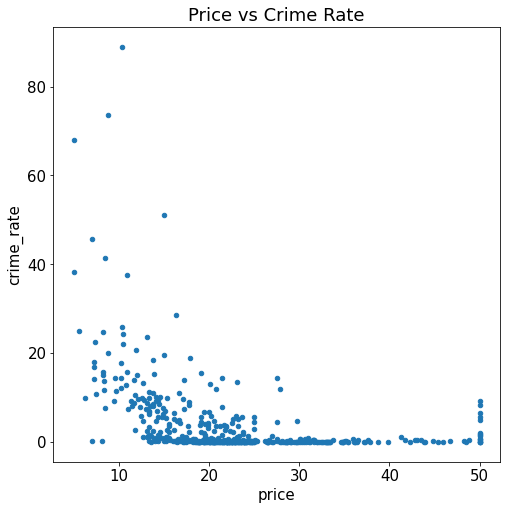

In [56]:
hp.plot(kind='scatter', x='price', y='crime_rate', title='Price vs Crime Rate');

- semicolon is to hide the <matplotlib.axes._subplots.AxesSubplot at 0x26613b5cc18> output when plotting in Jupyter notebooks.

- If we want to plot a simple Histogram based on a single column, we can call plot on a column

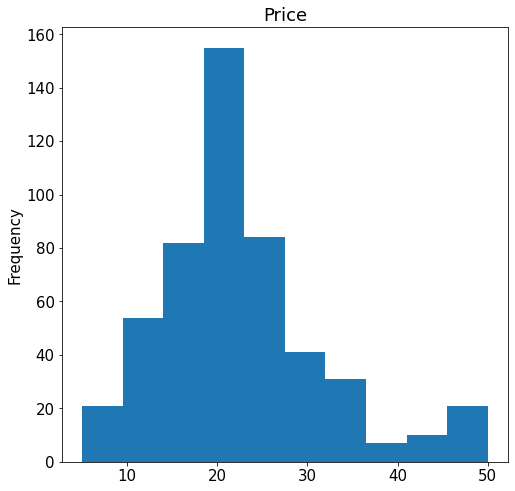

In [57]:
hp['price'].plot(kind='hist', title='Price');

- There is graphical representation of the interquartile range, called the Boxplot.
- we used to use describe function which give us numerical values.

In [53]:
hp['price'].describe()

count    506.000000
mean      22.528854
std        9.182176
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: price, dtype: float64

- Using a Boxplot we can visualize above data

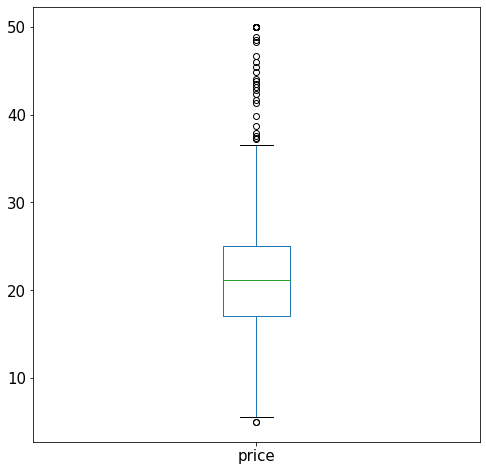

In [58]:
hp['price'].plot(kind="box");

#### Conclusion

- This is the simple and brief tutorial of Pandas.
- Pandas is very useful to clean, explore and visulize the Data in Python.
- You can use [Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html) to improve.